## MNIST

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X = mnist["data"]
y = mnist["target"]

* 열이 784(28 * 28) : 픽셀 정보, 가로 28, 세로 28

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib.pyplot as plt

In [9]:
some_digit = X[0]

In [10]:
some_digit_img = some_digit.reshape(28, 28)

In [11]:
some_digit_img.shape

(28, 28)

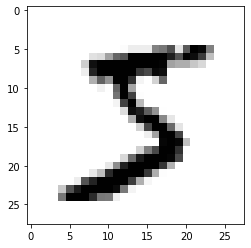

In [12]:
plt.imshow(some_digit_img, cmap='binary')

In [13]:
y[0]

'5'

In [14]:
y = y.astype(np.uint8)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
(y_train == 0).sum() # 60000개의 훈련 데이터 중 0의 개수는 5923개(대략 10%)

5923

## 이진 분류기

In [17]:
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [18]:
(y_train_5 == 1).sum()

5421

* 데이터 불균형(5인 값 10%, 나머지 90%)<br>
  문제: 무조건 5아님이라고 해도 정확도가 90%정도 나옴 -> 신뢰할 수 없음<br>
  즉, 이런 상황에서는 정확도가 성능 측정 지표가 될 수 없음

In [19]:
(y_train_5 == 0).sum()

54579

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [21]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [22]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
y_train_pred.shape

(60000,)

* 오차행렬(confusion_matrix)

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [27]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

* accuracy : 정확도 (TN + TP) / (TP + TN + FP + FN)

In [28]:
(53892 + 3530) /(53892 + 687 + 1891 + 3530)

0.9570333333333333

* precision : 정밀도 TP / (TP + FP)

In [29]:
3530 / (687 + 3530)

0.8370879772350012

In [30]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

* recall : 재현율 TP / (TP + FN)

In [31]:
3530 / (1891 + 3530)

0.6511713705958311

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

* f1_score : 정밀도와 재현율의 조화 평균

In [33]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [35]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

* 이전까지는 thresholds 0일 때 구한것 

In [36]:
from sklearn.metrics import precision_recall_curve

In [37]:
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [38]:
thresholds_90_precision = thresholds[np.argmax(precision >= 0.90)]

In [39]:
y_train_predict_90 = (y_scores > thresholds_90_precision)

In [40]:
precision_score(y_train_5, y_train_predict_90)

0.9

In [41]:
recall_score(y_train_5, y_train_predict_90)

0.47980077476480354